In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [37]:
df = pd.read_csv('diabetes.csv')

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
# Division del conjunto en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df)

In [46]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 460
Longitud del Validation Set: 154
Longitud del Test Set: 154


Para cada uno de los subconjuntos, separamos las etiquetas de las características de entrada.

In [47]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Outcome", axis=1)
y_train = train_set["Outcome"].copy()

In [48]:
# Conjunto de datos de validación
X_val = val_set.drop("Outcome", axis=1)
y_val = val_set["Outcome"].copy()

In [49]:
# Conjunto de datos de pruebas
X_test = test_set.drop("Outcome", axis=1)
y_test = test_set["Outcome"].copy()

In [50]:
# Entrenamos un algoritmo basado en regresión logística
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

Predicción de nuevos ejemplos
Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento del algoritmo de Regresión Logística. Utilizamos el subconjunto de validación.

In [51]:
y_pred = clf.predict(X_val)

Matriz de Confusión

In [52]:
confusion_matrix(y_val, y_pred)

array([[84, 20],
       [16, 34]], dtype=int64)

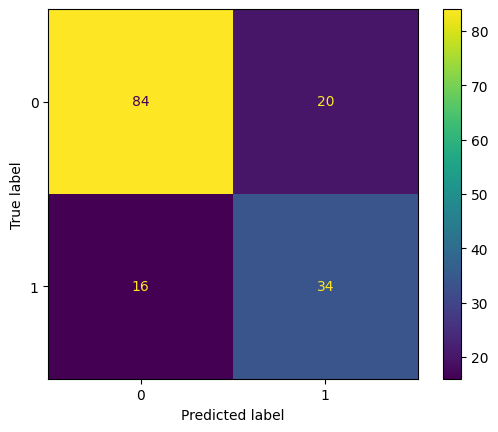

In [53]:
ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val)

Precisión

Métricas derivadas de la matriz de confusión

Recall

In [54]:
print("Precisión:", precision_score(y_val, y_pred))

Precisión: 0.6296296296296297


In [21]:
print("Recall:", recall_score(y_val, y_pred))

Recall: 0.68


F1 Score

In [22]:
print("F1 score:", f1_score(y_val, y_pred))

F1 score: 0.6538461538461539


Curvas ROC y PR

Curva ROC

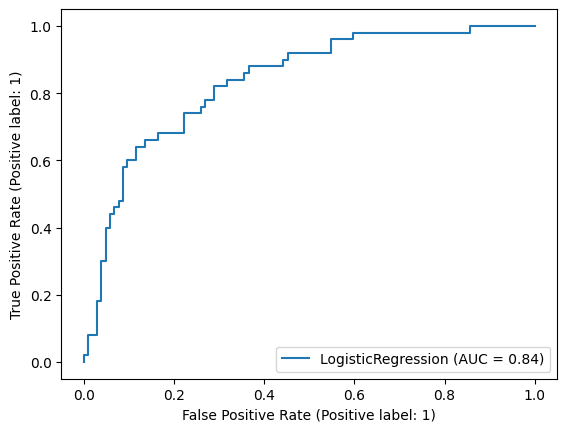

In [31]:
roc_display = RocCurveDisplay.from_estimator(clf, X_val, y_val)

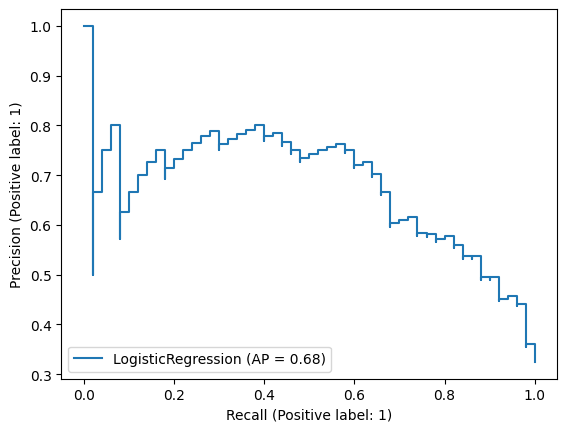

In [32]:
prec_recall_display = PrecisionRecallDisplay.from_estimator(clf, X_val, y_val)

Evaluación del modelo con el conjunto de datos de pruebas

In [33]:
y_pred = clf.predict(X_test)

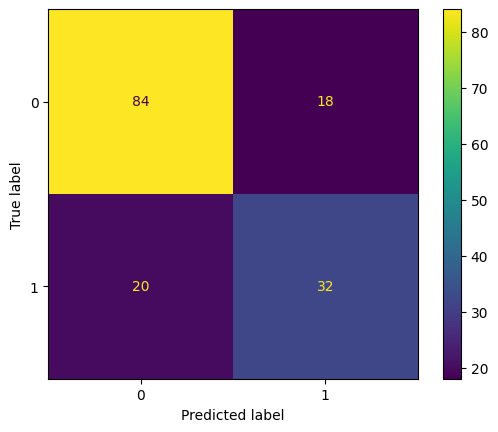

In [34]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [35]:
print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.6274509803921569
